In [1]:
data_dir = '../data'
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['Times New Roman']
sns.set_style("whitegrid")
sns.set_style({'font.family':'serif', 'font.serif':'Times New Roman'})
sns.set(font_scale=1.2)

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


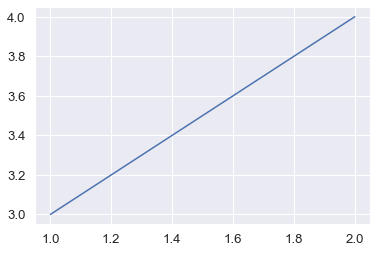

In [2]:
sns.lineplot([1,2],[3,4])
plt.show()

In [4]:
data = pd.read_csv(os.path.join(data_dir, "Womens_Clothing_E-Commerce_Reviews.csv"))
data.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [6]:
print('Column','\t&','Data Type','\t&','#Unique')
for idx,col in enumerate(data.columns[1:]):
    print(col,'\t&',list(data.dtypes)[idx],'\t&',len(set(data[col])))

Column 	& Data Type 	& #Unique
Clothing ID 	& int64 	& 1206
Age 	& int64 	& 77
Title 	& int64 	& 13994
Review Text 	& object 	& 22635
Rating 	& object 	& 5
Recommended IND 	& int64 	& 2
Positive Feedback Count 	& int64 	& 82
Division Name 	& int64 	& 4
Department Name 	& object 	& 7
Class Name 	& object 	& 21


In [4]:
data.describe()

,Unnamed: 0,Clothing ID,Age,Rating,Recommended IND,Positive Feedback Count
count,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000
mean,11742.500000,918.118709,43.198544,4.196032,0.822362,2.535936
std,6779.968547,203.298980,12.279544,1.110031,0.382216,5.702202
min,0.000000,0.000000,18.000000,1.000000,0.000000,0.000000
25%,5871.250000,861.000000,34.000000,4.000000,1.000000,0.000000
50%,11742.500000,936.000000,41.000000,5.000000,1.000000,1.000000
75%,17613.750000,1078.000000,52.000000,5.000000,1.000000,3.000000
max,23485.000000,1205.000000,99.000000,5.000000,1.000000,122.000000


In [19]:
print('Training set size',int(0.8*len(data)),'\tvalidation set size',int(0.1*len(data)),'\tTesting set size',int(0.1*len(data)))
print('Avg. title length',np.mean([len(i) for i in list(data['Title']) if not str(i)=='nan']),
        'Avg. Review length', np.mean([len(i) for i in list(data['Review Text'])  if not str(i)=='nan'])) # maybe recalculate after tokenize
print('Avg. title length (words)',np.mean([len(i.split()) for i in list(data['Title']) if not str(i)=='nan']),
        'Avg. Review length', np.mean([len(i.split()) for i in list(data['Review Text'])  if not str(i)=='nan']))

Training set size 18788 	validation set size 2348 	Testing set size 2348
Avg. title length 19.096767635698313 Avg. Review length 308.6879113113378
Avg. title length (words) 3.3446330554990853 Avg. Review length 60.19667859193498


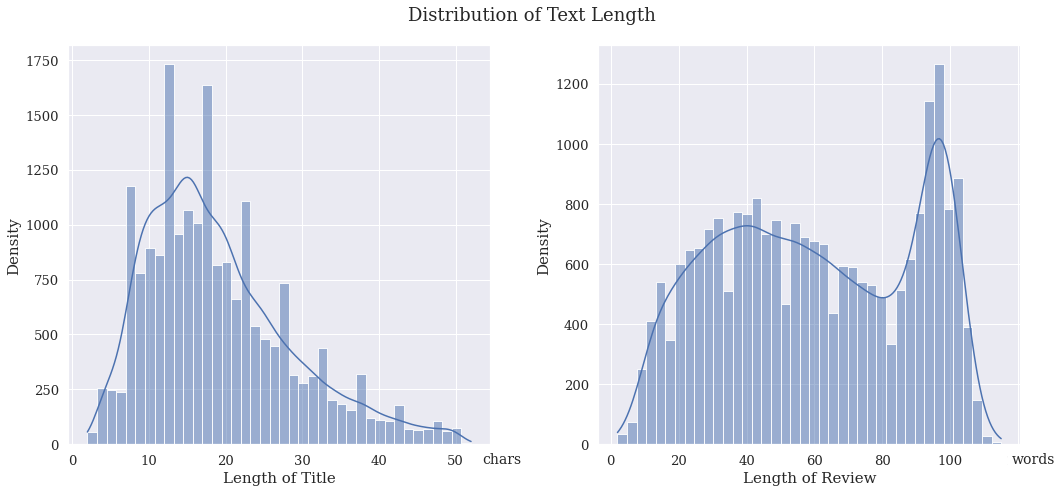

In [43]:
title_len = [len(i) for i in list(data['Title']) if not str(i)=='nan']
review_len = [len(i.split()) for i in list(data['Review Text'])  if not str(i)=='nan']
sns.set_style({'font.family':'serif', 'font.serif':'Times New Roman'})
fig, (ax1, ax2)= plt.subplots(1,2,figsize = (15,7))
sns.histplot(title_len,kde=True,bins = 40, ax=ax1)
props = dict(boxstyle='round', facecolor='white', alpha=0.5)
ax1.text(0.98, -0.02, 'chars', transform=ax1.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)

ax1.set_xlabel('Length of Title',fontsize = 15)
ax1.set_ylabel('Density',fontsize = 15)
ax1.set_title('', fontsize=10)
sns.histplot(review_len,kde=True,bins = 40, ax=ax2)
props = dict(boxstyle='round', facecolor='white', alpha=1)
ax2.text(0.98, -0.02, 'words', transform=ax2.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)
# ax1.set_xticks([0,20,40,60,80,100])
ax2.set_xlabel('Length of Review',fontsize = 15)
ax2.set_ylabel('Density',fontsize = 15)
ax2.set_title('', fontsize=10)
plt.suptitle('Distribution of Text Length',fontsize = 18)
plt.tight_layout()
plt.savefig('title_review_len.jpg',dpi=300)
plt.show()

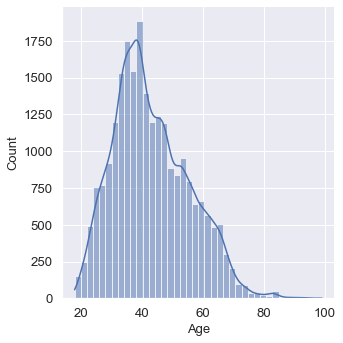

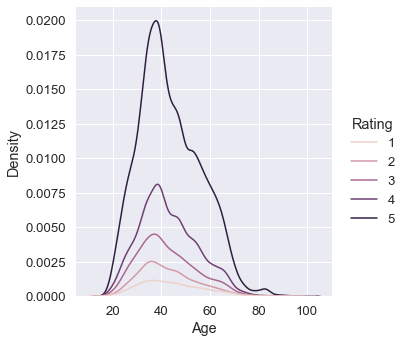

Text(0.5, 0, 'Rate')

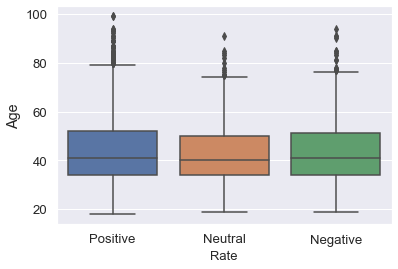

In [87]:
# fig, ((ax1, ax2), (ax3, ax4))= plt.subplots(2,2,figsize = (15,10))
sns.displot(data['Age'],kde=True,bins = 40)
plt.xlabel('Age',fontsize = 13)
plt.ylabel('Count',fontsize = 13)
plt.title('', fontsize=10)
plt.tight_layout()
plt.show()
sns.displot(data=data, x="Age", hue="Rating", kind="kde")
plt.show()
# sns.jointplot(data=data, x="Age", y="Rating", kind="reg")
def rate_type(x):
    if x>3: return 'Positive'
    elif x<3: return 'Negative'
    else: return 'Neutral'
data['rate type'] = data['Rating'].apply(lambda x: rate_type(x))
sns.boxplot(x="rate type", y="Age", data=data)
plt.xlabel('Rate',fontsize = 13)
# sns.boxplot(x="Recommended IND", y="Age", data=data)

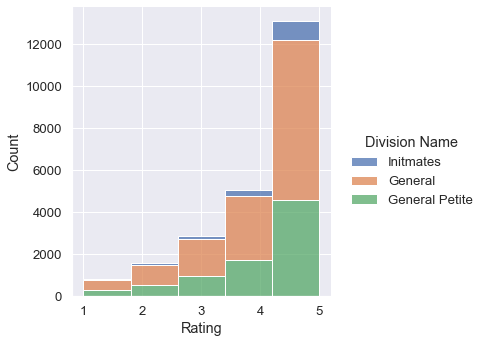

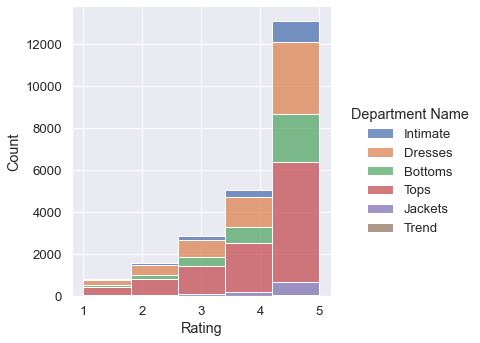

In [88]:
sns.displot(data=data, x="Rating", hue="Division Name", multiple="stack",bins = 5)
sns.displot(data=data, x="Rating", hue="Department Name", multiple="stack",bins = 5)
# len(list(set(data['Division Name']))) # 4
# len(list(set(data['Department Name']))) # 7
# len(list(set(data['Class Name']))) # 21

In [102]:
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
def preprocess_text(x):
    if type(x) != str: return(x)
    x = x.lower()
    lemmatizer = WordNetLemmatizer()
    porter_stemmer = PorterStemmer()
    x = " ".join([lemmatizer.lemmatize(word) for word in x.split()])
    x = " ".join([porter_stemmer.stem(word) for word in x.split()])
    return x
    
data['Review Text'] = data['Review Text'].apply(lambda x : preprocess_text(x))

In [103]:
pos_comments = data[data['Recommended IND']==1]['Review Text']
pos_comments = [c for c in pos_comments if str(c)!='nan']
neg_comments = data[data['Recommended IND']==0]['Review Text']
neg_comments = [c for c in neg_comments if str(c)!='nan']
import wordcloud

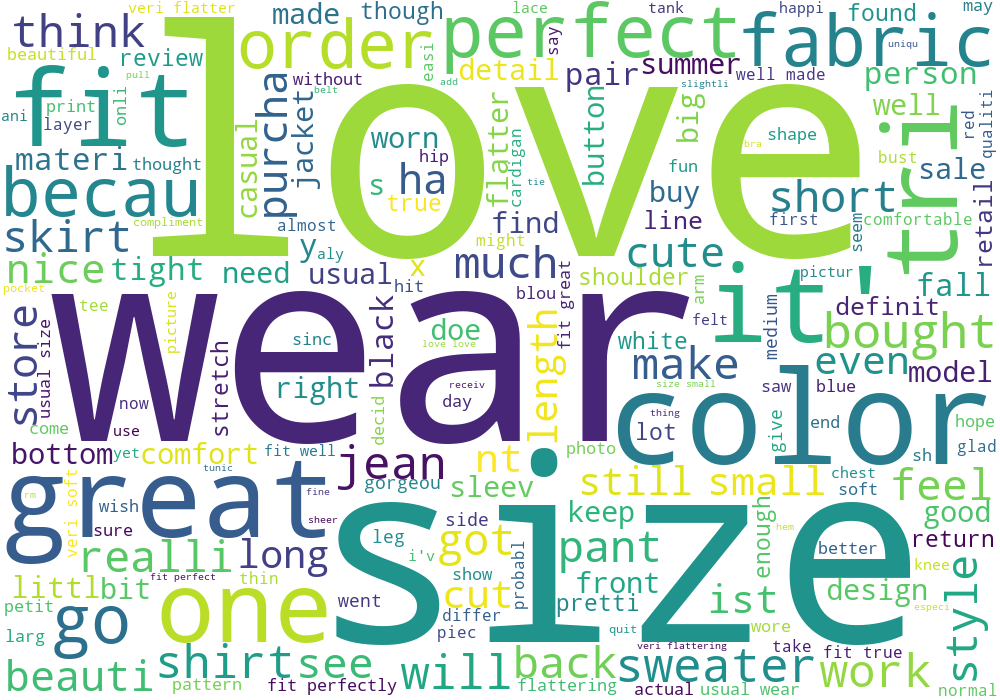

In [107]:
from collections import Counter
from IPython.display import Image
def gen_cloud(comments, ctype = 'pos'):
    w = wordcloud.WordCloud(width=1000,height=700,background_color='white')
    all = ' '.join(comments)
    tokens = [i for i in all.split()]
    comment_cnt = Counter(tokens)
    comment_cnt = sorted(comment_cnt.items(), key=lambda pair: pair[1], reverse=True)
    for pair in comment_cnt[:7]:
        all = all.replace(' '+pair[0]+' ',' ')
    all = all.replace('dress','')
    all = all.replace('top','')
    all = all.replace('look','')
    all = all.replace('wa','')
    w.generate(all)
    w.to_file(ctype+'_comment_wordcloud.png')
    return ctype+'_comment_wordcloud.png'
name = gen_cloud(neg_comments, ctype = 'neg')

name = gen_cloud(pos_comments, ctype = 'pos')
Image(filename=name)